In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sna
df = pd.read_csv(r'C:\Users\USER\Desktop\github\NIFTY500_dataset\Dataset\002_HINDUNILVR.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-02,408.149994,410.000000,401.500000,402.399994,338.508240,772876
1,2012-01-03,405.250000,411.700012,405.250000,407.950012,343.177063,1521362
2,2012-01-04,407.600006,407.600006,392.750000,395.450012,332.661774,2571970
3,2012-01-05,394.899994,398.850006,389.250000,393.350006,330.895172,3679775
4,2012-01-06,393.750000,399.649994,388.350006,396.799988,333.797455,1730249
...,...,...,...,...,...,...,...
2460,2021-12-27,2296.949951,2308.100098,2278.250000,2301.399902,2301.399902,584302
2461,2021-12-28,2310.000000,2318.399902,2297.750000,2309.100098,2309.100098,783710
2462,2021-12-29,2314.899902,2321.850098,2299.050049,2306.850098,2306.850098,1410236
2463,2021-12-30,2308.000000,2330.000000,2296.649902,2325.600098,2325.600098,963711


In [2]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
print(df.isna().sum())

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


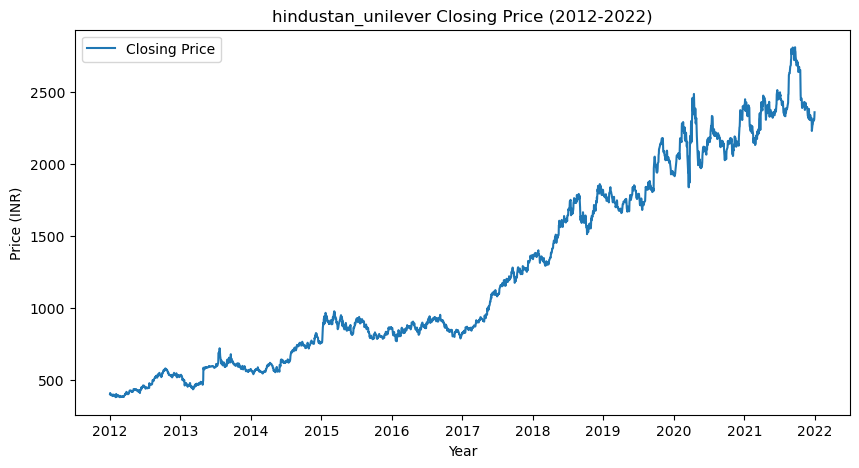

count    2465.000000
mean     1247.939513
std       674.332044
min       378.500000
25%       641.299988
50%       920.700012
75%      1814.900024
max      2812.449951
Name: Close, dtype: float64


In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(df['Close'], label='Closing Price')
plt.title('hindustan_unilever Closing Price (2012-2022)')
plt.xlabel('Year')
plt.ylabel('Price (INR)')
plt.legend()
plt.show()


print(df['Close'].describe())


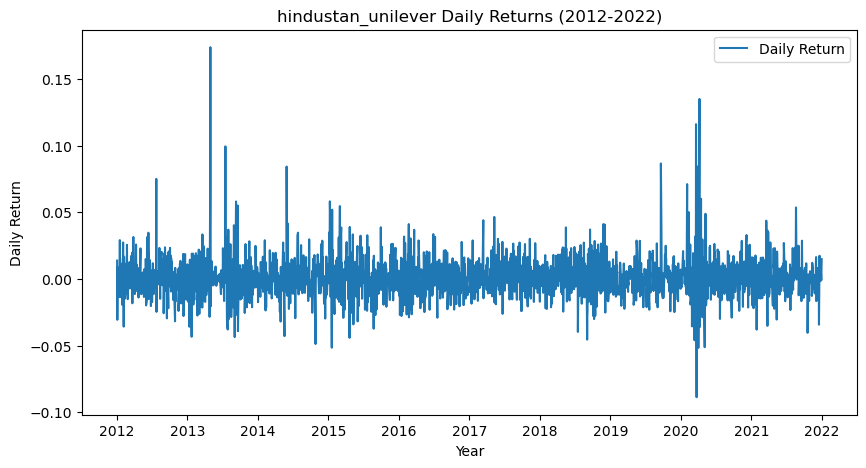

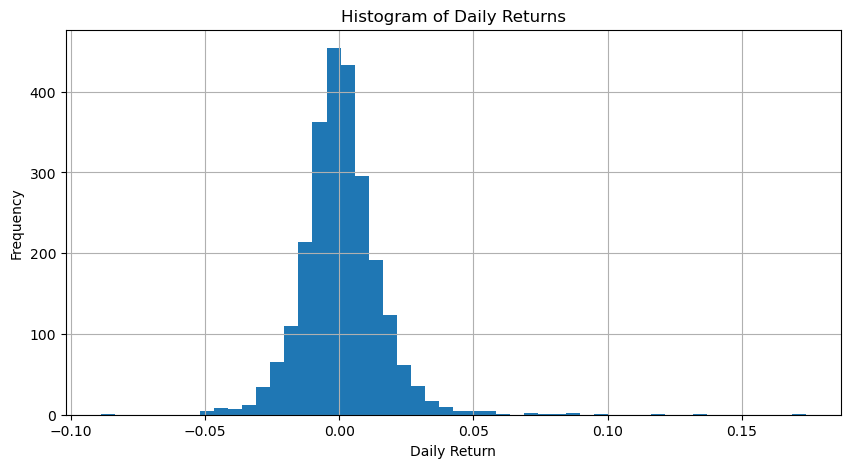

In [4]:

df['Daily Return'] = df['Close'].pct_change()

plt.figure(figsize=(10, 5))
plt.plot(df['Daily Return'], label='Daily Return')
plt.title('hindustan_unilever Daily Returns (2012-2022)')
plt.xlabel('Year')
plt.ylabel('Daily Return')
plt.legend()
plt.show()

df['Daily Return'].hist(bins=50, figsize=(10, 5))
plt.title('Histogram of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()


In [5]:
volatility = df['Daily Return'].std()
print(f'Volatility (Standard Deviation): {volatility}')

var_95 = df['Daily Return'].quantile(0.05)
print(f'Value at Risk (VaR) at 95% confidence level: {var_95}')

risk_free_rate = 0.04 / 252
sharpe_ratio = (df['Daily Return'].mean() - risk_free_rate) / volatility
print(f'Sharpe Ratio: {sharpe_ratio}')

Volatility (Standard Deviation): 0.015125477687175775
Value at Risk (VaR) at 95% confidence level: -0.02088410678803304
Sharpe Ratio: 0.04443980189819022


In [6]:
hindustan_unilever_df = pd.read_csv(r'C:\Users\USER\Desktop\github\NIFTY500_dataset\Dataset\002_HINDUNILVR.csv')
hindustan_unilever_df['Date'] = pd.to_datetime(hindustan_unilever_df['Date'])
hindustan_unilever_df.set_index('Date', inplace=True)
hindustan_unilever_df['Daily Return'] = hindustan_unilever_df['Close'].pct_change()
nifty_df = pd.read_csv(r'C:\Users\USER\Downloads\archive\NIFTY 50.csv')
nifty_df['Date'] = pd.to_datetime(nifty_df['Date'])
nifty_df.set_index('Date', inplace=True)
nifty_df['Daily Return'] = nifty_df['Close'].pct_change()
aligned_data = hindustan_unilever_df['Daily Return'].align(nifty_df['Daily Return'], join='inner')
cov_matrix = aligned_data[0].cov(aligned_data[1])
market_var = aligned_data[1].var()
beta = cov_matrix / market_var
print(f'Beta of hindustan_unilever: {beta}')


Beta of hindustan_unilever: 0.5705583439227484


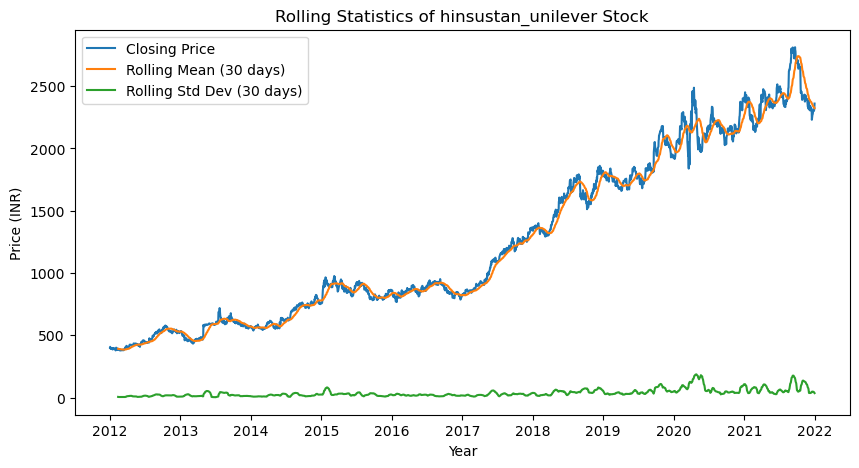

In [7]:
df['Rolling Mean'] = df['Close'].rolling(window=30).mean()
df['Rolling Std Dev'] = df['Close'].rolling(window=30).std()
plt.figure(figsize=(10, 5))
plt.plot(df['Close'], label='Closing Price')
plt.plot(df['Rolling Mean'], label='Rolling Mean (30 days)')
plt.plot(df['Rolling Std Dev'], label='Rolling Std Dev (30 days)')
plt.title('Rolling Statistics of hinsustan_unilever Stock')
plt.xlabel('Year')
plt.ylabel('Price (INR)')
plt.legend()
plt.show()


In [8]:
df.to_csv('hindustan_unilever_Risk_Analysis.csv')